<a href="https://colab.research.google.com/github/JonathasBBDS/reducao-dimensionalidade/blob/master/tratamento_cptu_dissertacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.8 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=5e6eef7ebf550234d3bf876eaa1451b2135a8c4be47db565ddf2920912c167c2
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=d253ffab404278c3cf79b75073c62a13a2dea67eaf2a8768274cb957b6ca635b
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [2]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import normaltest, zscore
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions

## Importando o DataSet

In [49]:
dados_scptu = pd.read_excel('scptu_dissertacao_colab.xlsx')
dados_scptu.head()

,ID,profundidade_m,qc_MPa,fs_kPa,u2_kPa,qt_MPa,gamma_kN_m3,sigma_v0_kPa,u0_kPa,sigma'_v0_kPa,...,Ic,Icrw,n,Qtn,U2,Su_kPa,Classificacao_Ic,Classificacao_Icrw,Classificacao_Bq,gamma_in_situ
0,CPTu-02,0.01,0.22,4.59,-0.95,0.219810,14.159908,0.141599,0.0,0.141599,...,1.565166,2.414536,0.446398,40.772159,-6.709083,15.690600,Areias,Misturas de Areias,Condição Drenada,14.159908
1,CPTu-02,0.02,0.22,7.05,0.00,0.220000,14.653895,0.293078,0.0,0.293078,...,1.826050,2.456820,0.545870,52.716301,0.000000,15.693352,Areias,Misturas de Areias,Condição Drenada,14.653895
2,CPTu-02,0.03,0.39,7.80,-1.42,0.389716,14.989434,0.449683,0.0,0.449683,...,1.612373,2.351402,0.464536,47.587767,-3.157780,27.804737,Areias,Misturas de Areias,Condição Drenada,14.989434
3,CPTu-02,0.04,0.39,8.18,-1.71,0.389658,15.044095,0.601764,0.0,0.601764,...,1.677759,2.367540,0.489523,47.218986,-2.841646,27.789731,Areias,Misturas de Areias,Condição Drenada,15.044095
4,CPTu-02,0.05,0.44,9.06,-2.09,0.439582,15.207857,0.760393,0.0,0.760393,...,1.690580,2.352472,0.494486,48.662645,-2.748579,31.344401,Areias,Misturas de Areias,Condição Drenada,15.207857


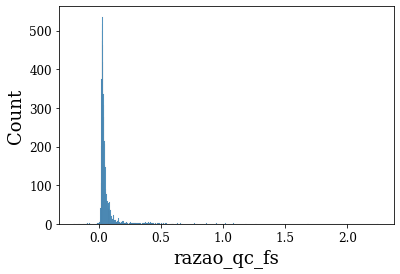

In [50]:
dados_scptu['razao_qc_fs'] = dados_scptu['qc_MPa'] / dados_scptu['fs_kPa']
sns.histplot(dados_scptu['razao_qc_fs'])

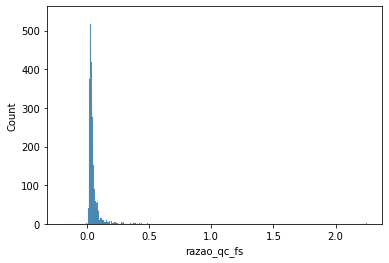

In [5]:
sns.histplot(dados_scptu['razao_qc_fs'])

In [6]:
dados_scptu['razao_qc_fs'].describe()

count    6825.000000
mean             NaN
std              NaN
min             -inf
25%         0.028223
50%         0.037037
75%         0.052989
max              inf
Name: razao_qc_fs, dtype: float64

## Limpeza do DataSet




### Retirar Valores NaN

**Contar Valores NaN Existentes**

In [51]:
dados_scptu.shape

(6826, 26)

In [52]:
dados_scptu.isna().sum()

ID                      0
profundidade_m          0
qc_MPa                  0
fs_kPa                  0
u2_kPa                157
qt_MPa                  0
gamma_kN_m3            68
sigma_v0_kPa           68
u0_kPa                  0
sigma'_v0_kPa          68
qn_MPa                 68
Qt                     68
Fr_%                   68
Rf_%                    2
Bq                     68
Ic                    141
Icrw                  141
n                     141
Qtn                   141
U2                     68
Su_kPa                 68
Classificacao_Ic      141
Classificacao_Icrw    141
Classificacao_Bq       68
gamma_in_situ          68
razao_qc_fs             1
dtype: int64

**Excluir Valores NaN**

In [53]:
dados_scptu_tratados = dados_scptu.dropna()
dados_scptu_tratados

,ID,profundidade_m,qc_MPa,fs_kPa,u2_kPa,qt_MPa,gamma_kN_m3,sigma_v0_kPa,u0_kPa,sigma'_v0_kPa,...,Icrw,n,Qtn,U2,Su_kPa,Classificacao_Ic,Classificacao_Icrw,Classificacao_Bq,gamma_in_situ,razao_qc_fs
0,CPTu-02,0.01,0.220,4.59,-0.95,0.219810,14.159908,0.141599,0.0000,0.141599,...,2.414536,0.446398,40.772159,-6.709083,15.690600,Areias,Misturas de Areias,Condição Drenada,14.159908,0.047930
1,CPTu-02,0.02,0.220,7.05,0.00,0.220000,14.653895,0.293078,0.0000,0.293078,...,2.456820,0.545870,52.716301,0.000000,15.693352,Areias,Misturas de Areias,Condição Drenada,14.653895,0.031206
2,CPTu-02,0.03,0.390,7.80,-1.42,0.389716,14.989434,0.449683,0.0000,0.449683,...,2.351402,0.464536,47.587767,-3.157780,27.804737,Areias,Misturas de Areias,Condição Drenada,14.989434,0.050000
3,CPTu-02,0.04,0.390,8.18,-1.71,0.389658,15.044095,0.601764,0.0000,0.601764,...,2.367540,0.489523,47.218986,-2.841646,27.789731,Areias,Misturas de Areias,Condição Drenada,15.044095,0.047677
4,CPTu-02,0.05,0.440,9.06,-2.09,0.439582,15.207857,0.760393,0.0000,0.760393,...,2.352472,0.494486,48.662645,-2.748579,31.344401,Areias,Misturas de Areias,Condição Drenada,15.207857,0.048565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,CPTu-28,25.38,4.155,53.00,403.57,4.235714,18.108474,459.593076,234.4590,225.134076,...,2.617865,0.962706,17.279667,0.751157,269.722923,Misturas de Siltes,Misturas de Siltes,Condição Drenada,18.108474,0.078396
6822,CPTu-28,25.40,3.957,58.00,413.84,4.039768,18.194015,462.127982,234.6552,227.472782,...,2.681282,0.985464,15.913752,0.787720,255.545716,Misturas de Siltes,Misturas de Siltes,Condição Drenada,18.194015,0.068224
6823,CPTu-28,25.42,3.736,66.00,424.44,3.820888,18.321290,465.727194,234.8514,230.875794,...,2.764513,1.015447,14.348620,0.821171,239.654343,Misturas de Siltes,Misturas de Siltes,Condição Drenada,18.321290,0.056606
6824,CPTu-28,25.44,3.586,64.00,432.71,3.672542,18.270709,464.806844,235.0476,229.759244,...,2.784295,1.021729,13.715121,0.860302,229.123940,Misturas de Siltes,Misturas de Siltes,Condição Drenada,18.270709,0.056031


In [55]:
dados_scptu_tratados.isna().sum()

ID                    0
profundidade_m        0
qc_MPa                0
fs_kPa                0
u2_kPa                0
qt_MPa                0
gamma_kN_m3           0
sigma_v0_kPa          0
u0_kPa                0
sigma'_v0_kPa         0
qn_MPa                0
Qt                    0
Fr_%                  0
Rf_%                  0
Bq                    0
Ic                    0
Icrw                  0
n                     0
Qtn                   0
U2                    0
Su_kPa                0
Classificacao_Ic      0
Classificacao_Icrw    0
Classificacao_Bq      0
gamma_in_situ         0
razao_qc_fs           0
dtype: int64

### Retirar Valores Negativos

**Contar Valores Negativos Existentes**

In [56]:
dados_scptu_tratados.iloc[:,1:21]

,profundidade_m,qc_MPa,fs_kPa,u2_kPa,qt_MPa,gamma_kN_m3,sigma_v0_kPa,u0_kPa,sigma'_v0_kPa,qn_MPa,Qt,Fr_%,Rf_%,Bq,Ic,Icrw,n,Qtn,U2,Su_kPa
0,0.01,0.220,4.59,-0.95,0.219810,14.159908,0.141599,0.0000,0.141599,0.219668,1551.340577,2.089513,2.088167,-0.004325,1.565166,2.414536,0.446398,40.772159,-6.709083,15.690600
1,0.02,0.220,7.05,0.00,0.220000,14.653895,0.293078,0.0000,0.293078,0.219707,749.653681,3.208820,3.204545,0.000000,1.826050,2.456820,0.545870,52.716301,0.000000,15.693352
2,0.03,0.390,7.80,-1.42,0.389716,14.989434,0.449683,0.0000,0.449683,0.389266,865.646032,2.003770,2.001457,-0.003648,1.612373,2.351402,0.464536,47.587767,-3.157780,27.804737
3,0.04,0.390,8.18,-1.71,0.389658,15.044095,0.601764,0.0000,0.601764,0.389056,646.526469,2.102524,2.099277,-0.004395,1.677759,2.367540,0.489523,47.218986,-2.841646,27.789731
4,0.05,0.440,9.06,-2.09,0.439582,15.207857,0.760393,0.0000,0.760393,0.438822,577.098560,2.064620,2.061049,-0.004763,1.690580,2.352472,0.494486,48.662645,-2.748579,31.344401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,25.38,4.155,53.00,403.57,4.235714,18.108474,459.593076,234.4590,225.134076,3.776121,16.772765,1.403557,1.251265,0.044784,2.628901,2.617865,0.962706,17.279667,0.751157,269.722923
6822,25.40,3.957,58.00,413.84,4.039768,18.194015,462.127982,234.6552,227.472782,3.577640,15.727772,1.621180,1.435726,0.050085,2.685602,2.681282,0.985464,15.913752,0.787720,255.545716
6823,25.42,3.736,66.00,424.44,3.820888,18.321290,465.727194,234.8514,230.875794,3.355161,14.532319,1.967119,1.727347,0.056507,2.759892,2.764513,1.015447,14.348620,0.821171,239.654343
6824,25.44,3.586,64.00,432.71,3.672542,18.270709,464.806844,235.0476,229.759244,3.207735,13.961289,1.995177,1.742662,0.061621,2.777826,2.784295,1.021729,13.715121,0.860302,229.123940


In [57]:
dados_scptu_tratados.iloc[:,1:21].lt(0).sum()

profundidade_m      0
qc_MPa              0
fs_kPa              0
u2_kPa            114
qt_MPa              0
gamma_kN_m3         0
sigma_v0_kPa        0
u0_kPa              0
sigma'_v0_kPa       0
qn_MPa              0
Qt                  0
Fr_%                0
Rf_%                0
Bq                291
Ic                  0
Icrw                0
n                   0
Qtn                 0
U2                291
Su_kPa              0
dtype: int64

**Excluir Valores Negativos**

In [13]:
dados_scptu_tratados = dados_scptu_tratados.query('u2_kPa > 0 and U2 > 0')
dados_scptu_tratados

,ID,profundidade_m,qc_MPa,fs_kPa,u2_kPa,qt_MPa,gamma_kN_m3,sigma_v0_kPa,u0_kPa,sigma'_v0_kPa,...,Icrw,n,Qtn,U2,Su_kPa,Classificacao_Ic,Classificacao_Icrw,Classificacao_Bq,gamma_in_situ,razao_qc_fs
30,CPTu-02,0.31,0.470,23.97,0.57,0.470114,16.352786,5.069364,0.0000,5.069364,...,2.630877,0.786202,48.354966,0.112440,33.217474,Misturas de Areias,Misturas de Siltes,Condição Drenada,16.352786,0.019608
38,CPTu-02,0.39,0.300,13.50,0.38,0.300076,15.520234,6.052891,0.0000,6.052891,...,2.730477,0.840865,31.022514,0.062780,21.001651,Misturas de Siltes,Misturas de Siltes,Condição Drenada,15.520234,0.022222
83,CPTu-02,0.84,0.350,20.73,6.84,0.351368,16.074101,13.502245,0.0000,13.502245,...,2.912881,0.955850,22.892522,0.506582,24.133268,Argilas,Misturas de Siltes,Condição Drenada,16.074101,0.016884
84,CPTu-02,0.85,0.270,18.78,11.87,0.272374,15.862816,13.483394,0.0000,13.483394,...,3.014130,1.006642,19.459649,0.880342,18.492186,Argilas,Argilas,Condição Drenada,15.862816,0.014377
85,CPTu-02,0.86,0.240,17.59,12.82,0.242564,15.743070,13.539040,0.0000,13.539040,...,3.057321,1.028396,17.910858,0.946891,16.358926,Argilas,Argilas,Condição Drenada,15.743070,0.013644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,CPTu-28,25.38,4.155,53.00,403.57,4.235714,18.108474,459.593076,234.4590,225.134076,...,2.617865,0.962706,17.279667,0.751157,269.722923,Misturas de Siltes,Misturas de Siltes,Condição Drenada,18.108474,0.078396
6822,CPTu-28,25.40,3.957,58.00,413.84,4.039768,18.194015,462.127982,234.6552,227.472782,...,2.681282,0.985464,15.913752,0.787720,255.545716,Misturas de Siltes,Misturas de Siltes,Condição Drenada,18.194015,0.068224
6823,CPTu-28,25.42,3.736,66.00,424.44,3.820888,18.321290,465.727194,234.8514,230.875794,...,2.764513,1.015447,14.348620,0.821171,239.654343,Misturas de Siltes,Misturas de Siltes,Condição Drenada,18.321290,0.056606
6824,CPTu-28,25.44,3.586,64.00,432.71,3.672542,18.270709,464.806844,235.0476,229.759244,...,2.784295,1.021729,13.715121,0.860302,229.123940,Misturas de Siltes,Misturas de Siltes,Condição Drenada,18.270709,0.056031


In [14]:
dados_scptu_tratados.iloc[:,1:21].lt(0).sum()

profundidade_m    0
qc_MPa            0
fs_kPa            0
u2_kPa            0
qt_MPa            0
gamma_kN_m3       0
sigma_v0_kPa      0
u0_kPa            0
sigma'_v0_kPa     0
qn_MPa            0
Qt                0
Fr_%              0
Rf_%              0
Bq                0
Ic                0
Icrw              0
n                 0
Qtn               0
U2                0
Su_kPa            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


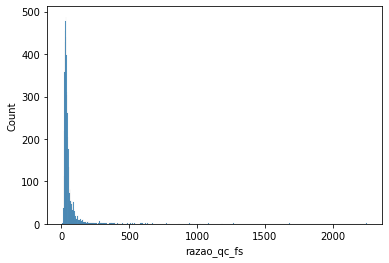

In [15]:
dados_scptu_tratados['razao_qc_fs'] = (dados_scptu_tratados['qc_MPa'] * 1000) / dados_scptu_tratados['fs_kPa']
sns.histplot(dados_scptu_tratados['razao_qc_fs'])

In [16]:
dados_scptu_tratados['razao_qc_fs'].describe()

count    6257.000000
mean       54.223366
std        78.992844
min         6.000000
25%        28.614458
50%        37.231504
75%        52.097695
max      2250.000000
Name: razao_qc_fs, dtype: float64

### Retirar Outliers

**Identificando e Removendo Outliers**

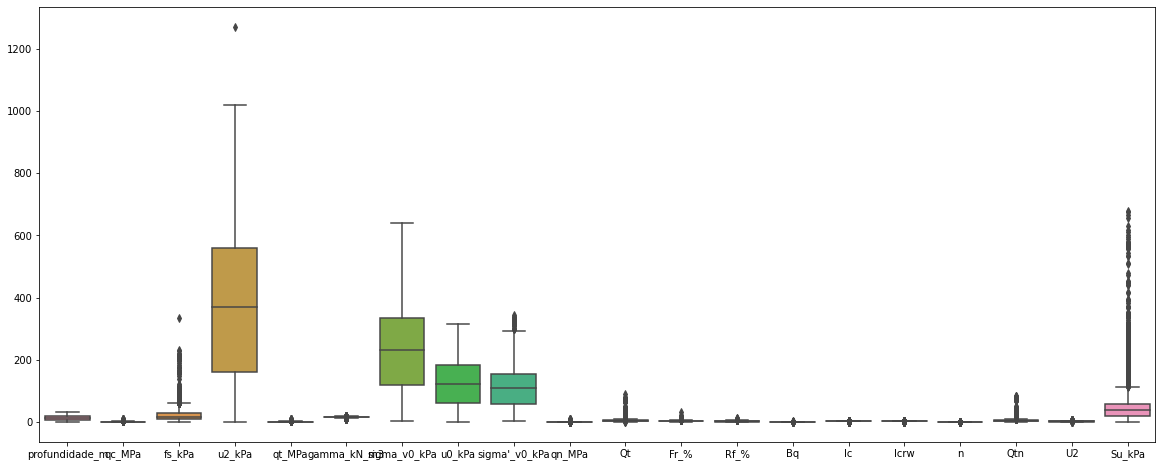

In [17]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(data=dados_scptu_tratados.iloc[:,1:21])

In [18]:
z_scores = zscore(dados_scptu_tratados.iloc[:,1:21])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = dados_scptu_tratados[filtered_entries]

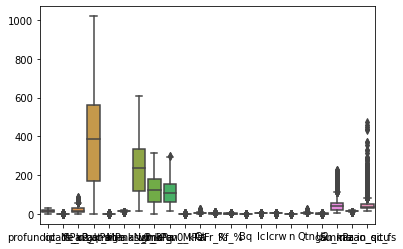

In [19]:
ax = sns.boxplot(data=new_df)

In [20]:
new_df.shape

(5881, 26)

In [21]:
# Q1 = valor.quantile(.25)
# Q3 = valor.quantile(.75)
# IIQ = Q3 - Q1
# limite_inferior = Q1 - 1.5*IIQ
# limite_superior = Q3 + 1.5*IIQ

# selecao = (valor >= limite_inferior) & (valor <= limite_superior)
# dados[selecao]

## Conhecendo o DataSet

**Atributos**

In [22]:
dados_scptu.columns

Index(['ID', 'profundidade_m', 'qc_MPa', 'fs_kPa', 'u2_kPa', 'qt_MPa',
       'gamma_kN_m3', 'sigma_v0_kPa', 'u0_kPa', 'sigma'_v0_kPa', 'qn_MPa',
       'Qt', 'Fr_%', 'Rf_%', 'Bq', 'Ic', 'Icrw', 'n', 'Qtn', 'U2', 'Su_kPa',
       'Classificacao_Ic', 'Classificacao_Icrw', 'Classificacao_Bq',
       'gamma_in_situ', 'razao_qc_fs'],
      dtype='object')

**Estatísticas Descritivas**

In [23]:
dados_scptu_tratados.describe()

,profundidade_m,qc_MPa,fs_kPa,u2_kPa,qt_MPa,gamma_kN_m3,sigma_v0_kPa,u0_kPa,sigma'_v0_kPa,qn_MPa,...,Rf_%,Bq,Ic,Icrw,n,Qtn,U2,Su_kPa,gamma_in_situ,razao_qc_fs
count,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,...,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000
mean,14.339258,0.880131,22.380732,381.760267,0.956483,16.003919,237.357409,125.180366,112.177043,0.719126,...,2.486850,0.468510,3.221275,3.226772,1.132661,6.317905,2.322811,51.366121,16.003919,54.223366
std,7.945116,0.900375,21.688351,233.050793,0.914584,1.330524,142.162271,79.254307,64.270054,0.837545,...,1.163848,0.220246,0.269633,0.262533,0.109271,6.011640,0.948242,59.824639,1.330524,78.992844
min,0.310000,0.030000,0.119000,0.380000,0.033892,10.004847,5.069364,0.000000,5.069364,0.021028,...,0.038601,0.000068,1.695885,1.664033,0.520913,0.715713,0.000431,1.501973,10.004847,6.000000
25%,7.800000,0.373000,8.560000,160.700000,0.412500,15.150683,119.807721,61.999200,59.016411,0.291206,...,1.720265,0.353848,3.168031,3.167566,1.103558,4.060801,1.768187,20.800412,15.150683,28.614458
50%,13.920000,0.728000,17.748000,370.770000,0.813160,16.254124,233.154579,122.036400,108.845250,0.561138,...,2.407398,0.501651,3.286271,3.285564,1.156458,5.083363,2.452042,40.081298,16.254124,37.231504
75%,20.080000,1.068000,29.184000,559.200000,1.190240,16.927842,335.501909,182.466000,155.120021,0.815496,...,3.164974,0.619092,3.363941,3.379760,1.198780,6.349331,2.933114,58.249749,16.927842,52.097695
max,33.500000,9.690000,334.077000,1270.000000,9.714686,20.385763,639.357009,314.116200,343.213529,9.472576,...,14.752744,4.889931,4.540902,4.543354,1.630649,84.684371,8.201125,676.612597,20.385763,2250.000000


### Ocorrência de Comportamentos

In [58]:
total_de_amostras = dados_scptu_tratados["Classificacao_Ic"].value_counts().sum()
comportamentos_observados = dados_scptu_tratados["Classificacao_Ic"].value_counts().index.to_list()

for n, i in zip(comportamentos_observados, dados_scptu_tratados["Classificacao_Ic"].value_counts()):
  # for n in range(0,len(dados_scptu_tratados["Classificacao_Ic"].value_counts())):
    print(f"{n}: {100*(i/total_de_amostras):.2f} %")

Argilas Orgânicas: 64.90 %
Argilas: 24.78 %
Misturas de Areias: 4.64 %
Misturas de Siltes: 4.50 %
Areias: 1.18 %


### Estatísticas Descritivas Da Parcela de Finos

**Aqui serão considerados as mistures de siltes, argilas e argilas orgânicas**

In [25]:
dados_scptu_tratados.query("Classificacao_Ic == 'Misturas de Siltes' or Classificacao_Ic == 'Argilas' or Classificacao_Ic == 'Argilas Orgânicas'").describe()

,profundidade_m,qc_MPa,fs_kPa,u2_kPa,qt_MPa,gamma_kN_m3,sigma_v0_kPa,u0_kPa,sigma'_v0_kPa,qn_MPa,...,Rf_%,Bq,Ic,Icrw,n,Qtn,U2,Su_kPa,gamma_in_situ,razao_qc_fs
count,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,...,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000
mean,14.528233,0.806099,22.621483,391.664771,0.884432,16.021379,240.472611,126.986474,113.486137,0.643959,...,2.558940,0.484043,3.257704,3.261314,1.147186,5.498821,2.371583,45.997096,16.021379,46.377749
std,7.920703,0.632124,21.774319,231.115959,0.657685,1.298938,141.774991,79.109250,64.034733,0.548930,...,1.123283,0.207698,0.195400,0.192619,0.080741,2.382128,0.869613,39.209290,1.298938,45.632895
min,0.390000,0.030000,0.119000,0.380000,0.033892,10.004847,6.052891,0.000000,6.052891,0.021028,...,0.047957,0.000073,2.541138,2.528309,0.829302,0.715713,0.000431,1.501973,10.004847,6.000000
25%,7.937500,0.363000,8.810000,172.452500,0.402950,15.188570,121.290071,63.348075,60.187312,0.282300,...,1.800187,0.376301,3.188535,3.186048,1.112276,4.028979,1.833930,20.164275,15.188570,28.321091
50%,14.260000,0.723000,17.990000,384.325000,0.811125,16.256044,236.528284,125.371800,110.072963,0.556026,...,2.457795,0.508043,3.292413,3.293603,1.159593,5.012081,2.483471,39.716144,16.256044,36.465837
75%,20.305000,1.047250,29.422250,564.565000,1.168175,16.918749,340.826802,184.673250,156.874498,0.803675,...,3.205826,0.623218,3.368489,3.382997,1.200624,6.193721,2.944059,57.405378,16.918749,49.454456
max,33.500000,7.105000,334.077000,1270.000000,7.206580,20.385763,639.357009,314.116200,343.213529,6.624103,...,14.752744,4.889931,4.540902,4.543354,1.630649,31.022514,7.061301,473.150215,20.385763,1680.672269


### Correlação dos Atributos da Parcela de Finos

In [26]:
dados_scptu_tratados.query("Classificacao_Ic == 'Misturas de Siltes' or Classificacao_Ic == 'Argilas' or Classificacao_Ic == 'Argilas Orgânicas'").corr()

,profundidade_m,qc_MPa,fs_kPa,u2_kPa,qt_MPa,gamma_kN_m3,sigma_v0_kPa,u0_kPa,sigma'_v0_kPa,qn_MPa,...,Rf_%,Bq,Ic,Icrw,n,Qtn,U2,Su_kPa,gamma_in_situ,razao_qc_fs
profundidade_m,1.000000,0.739762,0.574697,0.912066,0.775112,0.749533,0.995795,0.997103,0.972891,0.671489,...,-0.094777,0.030158,-0.028712,0.138278,0.354274,-0.157586,0.027289,0.671489,0.749533,-0.023385
qc_MPa,0.739762,1.000000,0.818080,0.527605,0.998216,0.746573,0.778859,0.734833,0.816599,0.994824,...,0.006698,-0.382635,-0.356051,-0.242219,-0.008715,0.398977,-0.255664,0.994824,0.746573,-0.025837
fs_kPa,0.574697,0.818080,1.000000,0.398472,0.814290,0.775637,0.639020,0.569154,0.711672,0.810576,...,0.420647,-0.340662,-0.008615,0.099595,0.270575,0.194285,-0.275747,0.810576,0.775637,-0.244634
u2_kPa,0.912066,0.527605,0.398472,1.000000,0.577382,0.659031,0.894462,0.910628,0.855367,0.460756,...,-0.112013,0.280912,0.028967,0.188158,0.361463,-0.269192,0.352520,0.460756,0.659031,-0.039650
qt_MPa,0.775112,0.998216,0.814290,0.577382,1.000000,0.763875,0.811453,0.770274,0.844978,0.988543,...,-0.001435,-0.348021,-0.340178,-0.219582,0.017028,0.364552,-0.220952,0.988543,0.763875,-0.027619
gamma_kN_m3,0.749533,0.746573,0.775637,0.659031,0.763875,1.000000,0.786255,0.739569,0.827122,0.712145,...,0.401763,-0.276593,0.043715,0.183886,0.364007,0.119053,-0.155526,0.712145,1.000000,-0.402693
sigma_v0_kPa,0.995795,0.778859,0.639020,0.894462,0.811453,0.786255,1.000000,0.992267,0.988174,0.713944,...,-0.037608,-0.017187,-0.024520,0.143372,0.364120,-0.123840,-0.014675,0.713944,0.786255,-0.066416
u0_kPa,0.997103,0.734833,0.569154,0.910628,0.770274,0.739569,0.992267,1.000000,0.961501,0.666603,...,-0.105776,0.032608,-0.040207,0.125097,0.339217,-0.146581,0.038593,0.666603,0.739569,-0.017990
sigma'_v0_kPa,0.972891,0.816599,0.711672,0.855367,0.844978,0.827122,0.988174,0.961501,1.000000,0.757165,...,0.047411,-0.078337,-0.004617,0.162885,0.387100,-0.093098,-0.080169,0.757165,0.827122,-0.124823
qn_MPa,0.671489,0.994824,0.810576,0.460756,0.988543,0.712145,0.713944,0.666603,0.757165,1.000000,...,0.007994,-0.412533,-0.401241,-0.300115,-0.073641,0.468762,-0.260937,1.000000,0.712145,-0.015937


In [27]:
correlacao_parcela_finos = dados_scptu_tratados.query("Classificacao_Ic == 'Misturas de Siltes' or Classificacao_Ic == 'Argilas' or Classificacao_Ic == 'Argilas Orgânicas'")[['profundidade_m', 'qt_MPa', 'fs_kPa', 'u2_kPa']].corr()

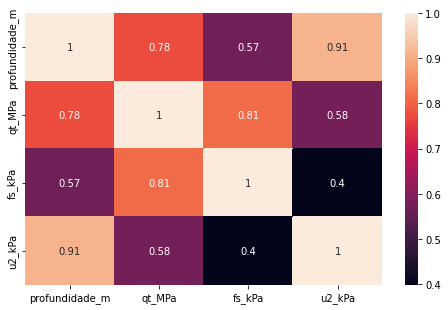

In [28]:
plt.figure(figsize=(8,5))
sns.heatmap(data=correlacao_parcela_finos, annot=True)

In [29]:
dados_scptu_tratados[["qc_MPa", "Classificacao_Ic"]].groupby(by="Classificacao_Ic").describe()

qc_MPa                                                     \
                     count      mean       std    min     25%    50%      75%   
Classificacao_Ic                                                                
Areias                30.0  7.863167  1.886059  1.736  8.0975  8.250  8.62000   
Argilas             1551.0  0.990416  0.818939  0.080  0.5300  0.820  1.14950   
Argilas Orgânicas   4221.0  0.696485  0.407766  0.030  0.3050  0.698  1.00000   
Misturas de Areias   207.0  2.021106  1.968179  0.330  0.4800  0.777  3.28200   
Misturas de Siltes   248.0  1.519016  1.326201  0.170  0.5100  1.310  2.07875   

                           
                      max  
Classificacao_Ic           
Areias              9.690  
Argilas             6.356  
Argilas Orgânicas   3.465  
Misturas de Areias  7.982  
Misturas de Siltes  7.105

In [30]:
dados_scptu_tratados["Classificacao_Ic"].value_counts().index.to_list()

['Argilas Orgânicas',
 'Argilas',
 'Misturas de Siltes',
 'Misturas de Areias',
 'Areias']

In [31]:
dados_scptu_tratados["Classificacao_Ic"].value_counts().index[0]

'Argilas Orgânicas'

In [32]:
dados_scptu_tratados.query("Classificacao_Bq == 'Condição Não Drenada' ")['Su_kPa']

94       1.501973
95       1.503797
96       2.205881
242      4.883484
243      4.912583
          ...    
6451    56.125681
6452    48.211438
6571    50.287068
6654    80.236462
6669    76.468108
Name: Su_kPa, Length: 3150, dtype: float64

In [33]:
dados_scptu_tratados["Classificacao_Ic"].unique()

array(['Misturas de Areias', 'Misturas de Siltes', 'Argilas',
       'Argilas Orgânicas', 'Areias'], dtype=object)

In [34]:
Su = dados_scptu_tratados.query("Classificacao_Bq == 'Condição Não Drenada'")["Su_kPa"].values
# Su = dados_scptu_tratados.query("Classificacao_Ic == 'Argilas'")["Su_kPa"].values
Su

array([ 1.50197264,  1.50379657,  2.20588088, ..., 50.28706777,
       80.23646184, 76.46810826])

,sumsquare_error,aic,bic,kl_div
burr,0.004210,962.404374,-42573.195435,inf
beta,0.005031,904.357927,-42011.597851,inf
norm,0.005788,935.919239,-41586.366982,inf
gamma,0.005815,936.958796,-41563.675450,inf
rayleigh,0.005944,923.205521,-41502.738256,inf


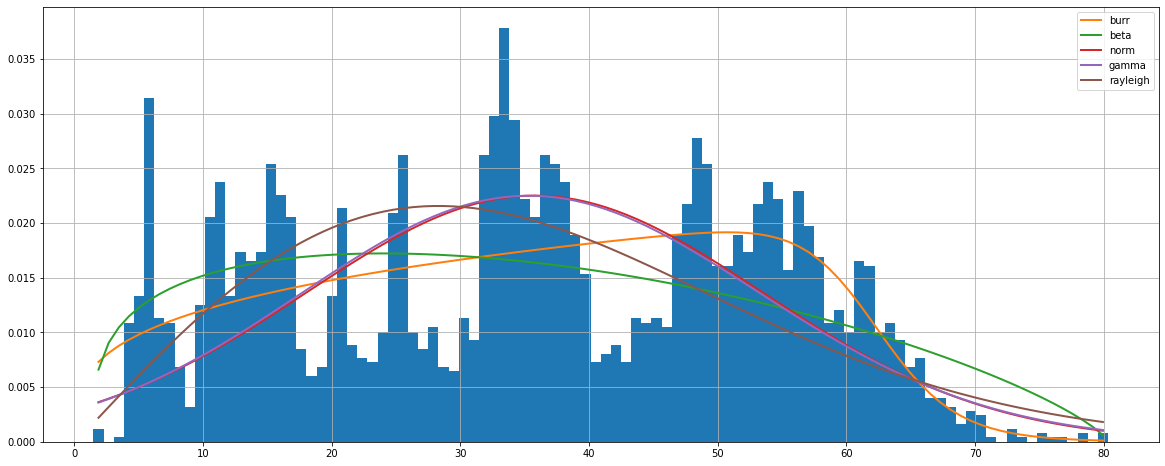

In [35]:
plt.figure(figsize=(20,8))
f = Fitter(Su,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm",
                          "gamma",
                          "rayleigh",
                          "uniform",
                          "chi2",
                          "exponpow"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
burr,0.032883,929.905667,-5678.000775,inf
norm,0.033130,921.062601,-5686.381656,inf
lognorm,0.033159,922.401085,-5679.505283,inf
beta,0.033204,920.579389,-5672.342801,inf
gamma,0.033219,920.497702,-5678.442891,inf


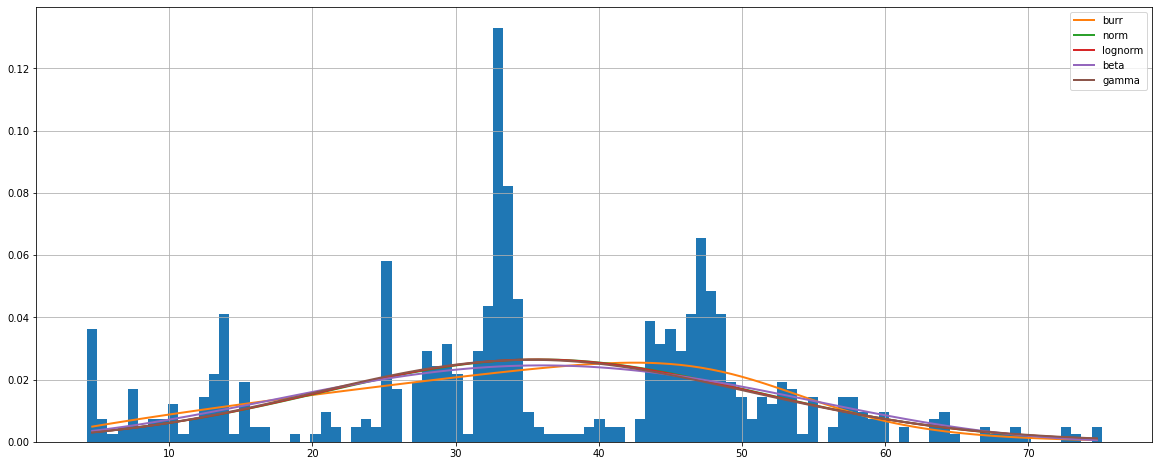

In [36]:
Su = dados_scptu_tratados.query("Classificacao_Bq == 'Condição Não Drenada' and Classificacao_Ic == 'Argilas'")["Su_kPa"].values
# Su = dados_scptu_tratados.query("Classificacao_Ic == 'Argilas'")["Su_kPa"].values

plt.figure(figsize=(20,8))
f = Fitter(Su,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm",
                          "gamma",
                          "rayleigh",
                          "uniform",
                          "chi2",
                          "exponpow"])
f.fit()
f.summary()

### Gráfico CPTu - Penetração

Text(0, 0.5, 'Profundidade (m)')

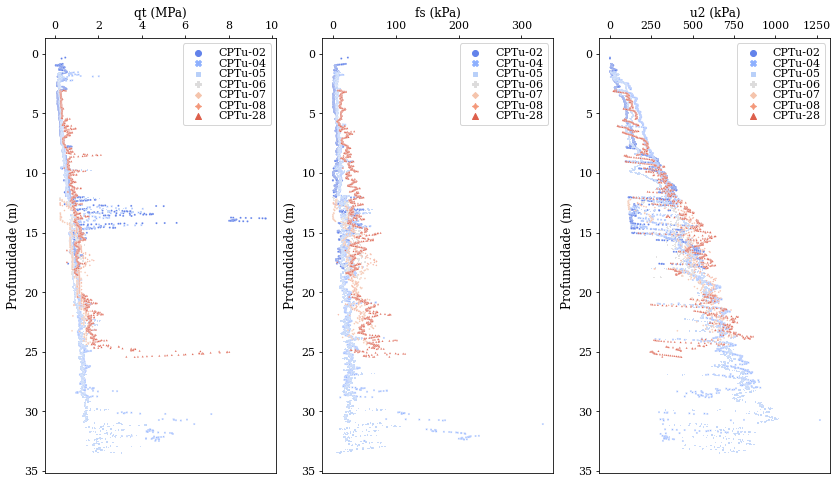

In [37]:
parameters = {'axes.labelsize': 12,
              'axes.titlesize': 16,
              'legend.labelspacing':0.05,
              'legend.fontsize': 11,
              'legend.loc': 'best',
              'xtick.labelsize': 11,
              'ytick.labelsize': 11,
              'font.family': 'serif'
              }
plt.rcParams.update(parameters)

f = plt.figure(figsize=(24,8))
ax1 = f.add_subplot(151)
ax1 = sns.scatterplot(data=dados_scptu_tratados, x=dados_scptu_tratados['qt_MPa'], y=dados_scptu_tratados['profundidade_m'],
                      hue='ID', style='ID', s=4, palette="coolwarm")
# sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
plt.legend(loc = 'best')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
ax1.set_xlabel("qt (MPa)")
ax1.set_ylabel("Profundidade (m)")

ax2 = f.add_subplot(152)
ax2 = sns.scatterplot(data=dados_scptu_tratados, x=dados_scptu_tratados['fs_kPa'], y=dados_scptu_tratados['profundidade_m'],
                      hue='ID', style='ID', s=4, palette="coolwarm")
# sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
plt.legend(loc = 'best')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
ax2.set_xlabel("fs (kPa)")
ax2.set_ylabel("Profundidade (m)")

ax3 = f.add_subplot(153)
ax3 = sns.scatterplot(data=dados_scptu_tratados, x=dados_scptu_tratados['u2_kPa'], y=dados_scptu_tratados['profundidade_m'],
                      hue='ID', style='ID', s=4, palette="coolwarm")
# sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
plt.legend(loc = 'best')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
ax3.set_xlabel("u2 (kPa)")
ax3.set_ylabel("Profundidade (m)")

# ax4 = f.add_subplot(154)
# ax4 = sns.scatterplot(data=dados_scptu_tratados, x=dados_scptu_tratados['Qtn'], y=dados_scptu_tratados['profundidade_m'],
#                       hue='ID', style='ID', s=10, palette="seismic")
# # sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
# plt.legend(loc = 'best')
# plt.gca().invert_yaxis()
# plt.gca().xaxis.set_label_position('top')
# plt.gca().xaxis.tick_top()
# ax4.set_xlabel("Peso Específico (kN/m³)")
# ax4.set_ylabel("Profundidade (m)")


In [38]:
dados_scptu_tratados['qt_MPa'].describe()

count    6257.000000
mean        0.956483
std         0.914584
min         0.033892
25%         0.412500
50%         0.813160
75%         1.190240
max         9.714686
Name: qt_MPa, dtype: float64

### Gráfico CPTu - Normalizado

In [39]:
dados_scptu_tratados.columns

Index(['ID', 'profundidade_m', 'qc_MPa', 'fs_kPa', 'u2_kPa', 'qt_MPa',
       'gamma_kN_m3', 'sigma_v0_kPa', 'u0_kPa', 'sigma'_v0_kPa', 'qn_MPa',
       'Qt', 'Fr_%', 'Rf_%', 'Bq', 'Ic', 'Icrw', 'n', 'Qtn', 'U2', 'Su_kPa',
       'Classificacao_Ic', 'Classificacao_Icrw', 'Classificacao_Bq',
       'gamma_in_situ', 'razao_qc_fs'],
      dtype='object')

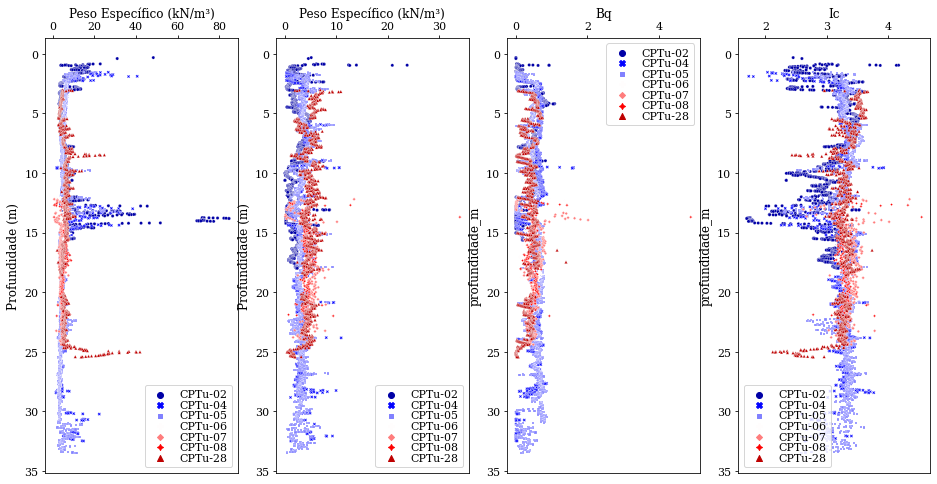

In [40]:
f = plt.figure(figsize=(20,8))
ax1 = f.add_subplot(151)
ax1 = sns.scatterplot(data=dados_scptu_tratados, x=dados_scptu_tratados['Qtn'], y=dados_scptu_tratados['profundidade_m'],
                      hue='ID', style='ID', s=10, palette="seismic")
# sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
plt.legend(loc = 'best')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
ax1.set_xlabel("Peso Específico (kN/m³)")
ax1.set_ylabel("Profundidade (m)")

ax2 = f.add_subplot(152)
ax2 = sns.scatterplot(data=dados_scptu_tratados, x=dados_scptu_tratados['Fr_%'], y=dados_scptu_tratados['profundidade_m'],
                      hue='ID', style='ID', s=10, palette="seismic")
# sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
plt.legend(loc = 'best')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
ax2.set_xlabel("Peso Específico (kN/m³)")
ax2.set_ylabel("Profundidade (m)")

ax3 = f.add_subplot(153)
ax3 = sns.scatterplot(data=dados_scptu_tratados, x=dados_scptu_tratados['Bq'], y=dados_scptu_tratados['profundidade_m'],
                      hue='ID', style='ID', s=10, palette="seismic")
# sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
plt.legend(loc = 'best')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()


ax4 = f.add_subplot(154)
ax4 = sns.scatterplot(data=dados_scptu_tratados, x=dados_scptu_tratados['Ic'], y=dados_scptu_tratados['profundidade_m'],
                      hue='ID', style='ID', s=10, palette="seismic")
# sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
plt.legend(loc = 'best')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()


## Histograma para Su

## Peso Específico



### Gráficos Dissipação

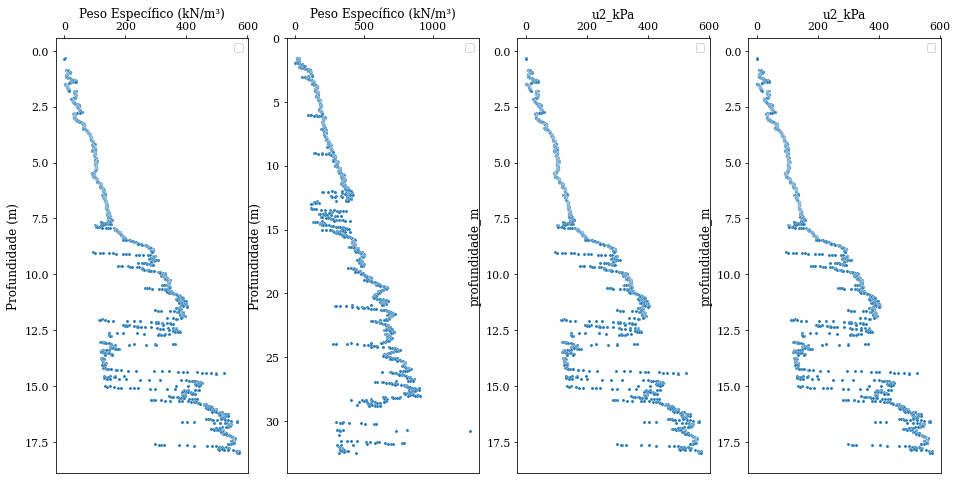

In [41]:
f = plt.figure(figsize=(20,8))
ax1 = f.add_subplot(151)
ax1 = sns.scatterplot(data=dados_scptu_tratados.query("ID == 'CPTu-02'"), x='u2_kPa', y='profundidade_m',
                      s=10, palette="seismic")
# sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
plt.legend(loc = 'best')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
ax1.set_xlabel("Peso Específico (kN/m³)")
ax1.set_ylabel("Profundidade (m)")

ax2 = f.add_subplot(152)
ax2 = sns.scatterplot(data=dados_scptu_tratados.query("ID == 'CPTu-04'"), x='u2_kPa', y='profundidade_m',
                      s=10, palette="seismic")
# sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
plt.legend(loc = 'best')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
ax2.set_xlabel("Peso Específico (kN/m³)")
ax2.set_ylabel("Profundidade (m)")

ax3 = f.add_subplot(153)
ax3 = sns.scatterplot(data=dados_scptu_tratados.query("ID == 'CPTu-02'"), x='u2_kPa', y='profundidade_m',
                      s=10, palette="seismic")
# sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
plt.legend(loc = 'best')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()


ax4 = f.add_subplot(154)
ax4 = sns.scatterplot(data=dados_scptu_tratados.query("ID == 'CPTu-02'"), x='u2_kPa', y='profundidade_m',
                      s=10, palette="seismic")
# sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
plt.legend(loc = 'best')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

In [42]:


## note the reversal of the y-axis with ylim=c(150,0)
# plot(depth ~ prop, data=soil, ylim=c(150,0), type='s', ylab='Depth', xlab='Property', main='Property vs. Depth Plot')

,sumsquare_error,aic,bic,kl_div
burr,0.004065,953.065088,-41722.866292,inf
beta,0.004959,924.488600,-41109.958526,inf
norm,0.005927,934.273865,-40576.296286,inf
gamma,0.005965,935.218821,-40548.277595,inf
rayleigh,0.006073,922.149113,-40501.345946,inf


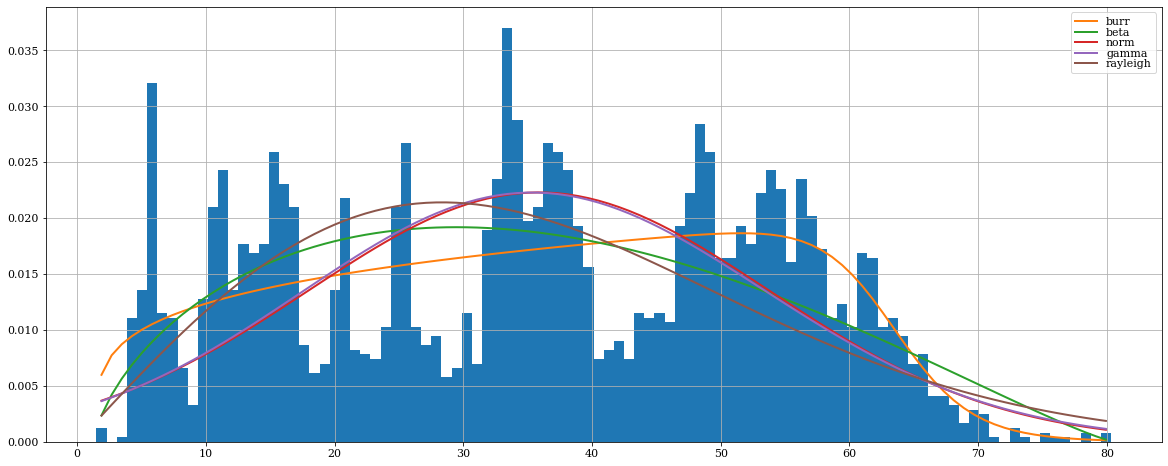

In [43]:
Su = dados_scptu_tratados.query("Classificacao_Bq == 'Condição Não Drenada' and (Classificacao_Ic == 'Argilas Orgânicas' or Classificacao_Ic == 'Argilas')")["Su_kPa"].values
# Su = dados_scptu_tratados.query("Classificacao_Ic == 'Argilas'")["Su_kPa"].values

plt.figure(figsize=(20,8))
f = Fitter(Su,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm",
                          "gamma",
                          "rayleigh",
                          "uniform",
                          "chi2",
                          "exponpow"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
burr,0.190508,711.873086,-65034.798606,inf
norm,0.317404,789.133987,-61858.208440,inf
lognorm,0.318594,792.645822,-61826.060347,inf
gamma,0.348980,806.816779,-61256.071884,inf
chi2,0.349181,814.286220,-61252.465582,inf


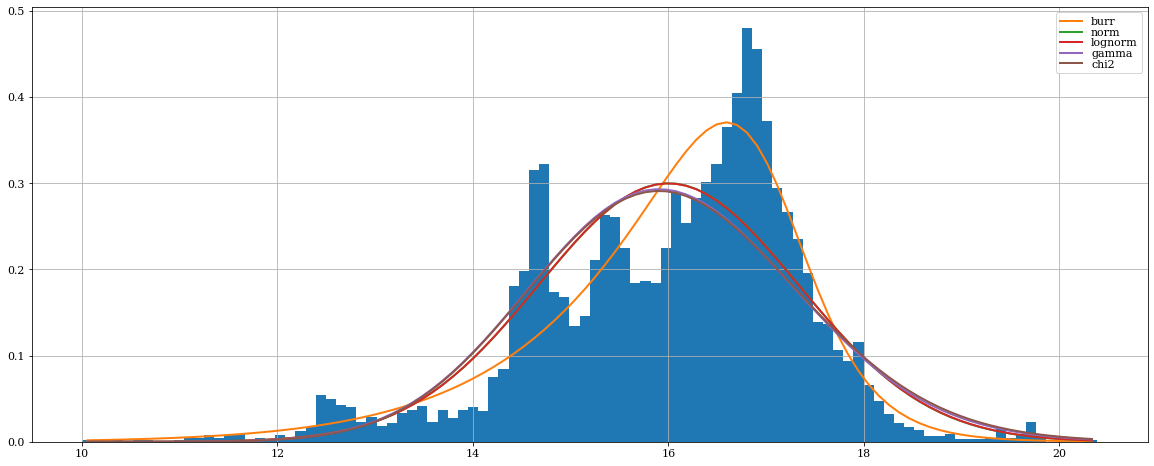

In [44]:
gamma = dados_scptu_tratados["gamma_kN_m3"].values

plt.figure(figsize=(20,8))
f = Fitter(gamma,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm",
                          "gamma",
                          "rayleigh",
                          "uniform",
                          "chi2",
                          "exponpow",
                          "poisson"])
f.fit()
f.summary()

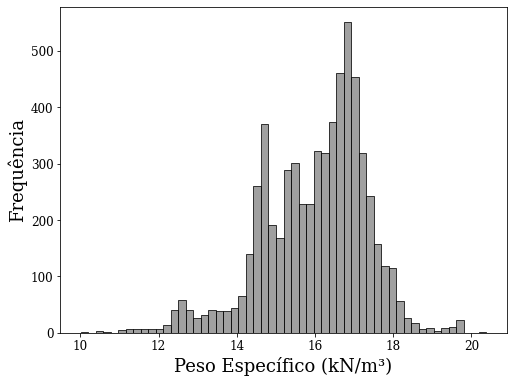

In [45]:
plt.figure(figsize=(8,6))

parameters = {'axes.labelsize': 18,
              'axes.titlesize': 22,
              'axes.titlelocation': 'left',
              'legend.labelspacing':0.25,
              'legend.fontsize': 14,
              'legend.handlelength': 2,
              'legend.loc': 'upper left',
              'xtick.labelsize': 12,
              'ytick.labelsize': 12,
              'font.family': 'serif'
              }
plt.rcParams.update(parameters)

ax = sns.histplot(data=dados_scptu_tratados, x='gamma_kN_m3', color='gray', palette="seismic")
ax.set_xlabel("Peso Específico (kN/m³)")
ax.set_ylabel("Frequência")
plt.show()

In [46]:
dados_scptu_tratados["gamma_kN_m3"].describe()

count    6257.000000
mean       16.003919
std         1.330524
min        10.004847
25%        15.150683
50%        16.254124
75%        16.927842
max        20.385763
Name: gamma_kN_m3, dtype: float64

In [47]:
from scipy.stats import burr

# sns.histplot(data=dados_scptu_tratados, x="gamma_kN_m3", kde=True, palette="seismic")

sns.histplot(data=gamma_v2[0], kde=True, palette="seismic")

c, d = 10.5, 4.3
mean, var, skew, kurt = burr.stats(c, d, moments='mvsk')
print(mean, var, skew, kurt)

NameError: ignored

In [ ]:
gamma

In [ ]:
gamma = gamma.reshape(-1,1)

### Escalar os Dados

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
padronizador = MinMaxScaler()
padronizador.fit(gamma)
gamma_v2 = padronizador.transform(gamma)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, normalize
padronizador = MinMaxScaler()
padronizador_v2 = Normalizer()
padronizador.fit(gamma)
padronizador_v2.fit(gamma)

gamma_v2 = padronizador.transform(gamma)
gamma_v3 = padronizador_v2.transform(gamma)
gamma_v4 = normalize(gamma, norm='l1')

In [ ]:
gamma_v3

In [ ]:
gamma_v2

In [ ]:
pd.DataFrame(gamma_v2).describe()

In [ ]:
predictions = padronizador.inverse_transform(gamma_v2.reshape(-1,1)).reshape(-1)

In [ ]:
predictions

In [ ]:
pd.DataFrame(predictions).describe()

In [ ]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme", "burr"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

get_best_distribution(predictions)

### Melhor Distribuição para os dados Escalados - MinMaxScaler



In [ ]:
get_best_distribution(gamma_v2)

In [ ]:
sns.histplot(data=pd.DataFrame(gamma_v2), kde=True, palette="seismic")

### Melhor Distribuição para os dados Escalados - Normalizer


In [ ]:
pd.DataFrame(gamma_v4).describe()

### Melhor Distribuição para os dados Brutos

In [ ]:
get_best_distribution(predictions)

In [ ]:
sns.histplot(data=pd.DataFrame(predictions), kde=True, palette="seismic")

In [ ]:
from scipy.stats import weibull_min
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

c = 1
mean, var, skew, kurt = weibull_min.stats(c, moments='mvsk')

x = np.linspace(weibull_min.ppf(0.01, c),
                weibull_min.ppf(0.99, c), 100)
ax.plot(x, weibull_min.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='weibull_min pdf')

rv = weibull_min(c)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = weibull_min.ppf([0.001, 0.5, 0.999], c)
np.allclose([0.001, 0.5, 0.999], weibull_min.cdf(vals, c))

r = weibull_min.rvs(c, size=1000)

ax.hist(gamma_v2, density=True, histtype='stepfilled', alpha=0.2, bins=25)
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
rv

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Su_kPa", y="profundidade_m", hue="ID", data=dados_scptu_tratados.query("Classificacao_Bq == 'Condição Não Drenada' and (Classificacao_Ic == 'Argilas Orgânicas' or Classificacao_Ic == 'Argilas')"))

# Ensaios de Dissipação

In [59]:
dados_dissipacao = pd.read_excel("ensaios_de_dissipacao.xlsx")
dados_dissipacao

,ID,profundidade_cm,tempo_s,u2_kPa
0,CPTu-02,900,1.0,285.510
1,CPTu-02,900,2.0,284.090
2,CPTu-02,900,3.0,283.800
3,CPTu-02,900,4.0,283.040
4,CPTu-02,900,5.0,282.190
...,...,...,...,...
60649,CPTu-08,2105,1020.0,388.407
60650,CPTu-08,2105,1050.0,385.177
60651,CPTu-08,2105,1080.0,382.305
60652,CPTu-08,2105,1110.0,379.495


## Converter porfundidade em metros

In [60]:
dados_dissipacao["profundidade_m"] = dados_dissipacao["profundidade_cm"] / 100
dados_dissipacao.head()

,ID,profundidade_cm,tempo_s,u2_kPa,profundidade_m
0,CPTu-02,900,1.0,285.51,9.0
1,CPTu-02,900,2.0,284.09,9.0
2,CPTu-02,900,3.0,283.80,9.0
3,CPTu-02,900,4.0,283.04,9.0
4,CPTu-02,900,5.0,282.19,9.0


In [61]:
dados_dissipacao["raiz_do_tempo_s"] = np.sqrt(dados_dissipacao["tempo_s"])
dados_dissipacao.head()

,ID,profundidade_cm,tempo_s,u2_kPa,profundidade_m,raiz_do_tempo_s
0,CPTu-02,900,1.0,285.51,9.0,1.000000
1,CPTu-02,900,2.0,284.09,9.0,1.414214
2,CPTu-02,900,3.0,283.80,9.0,1.732051
3,CPTu-02,900,4.0,283.04,9.0,2.000000
4,CPTu-02,900,5.0,282.19,9.0,2.236068


In [62]:
dados_dissipacao.profundidade_m.unique()

array([ 9.  , 12.  , 15.  , 18.  ,  3.  ,  6.  ,  8.99, 14.99, 17.98,
       20.93, 23.91, 26.88, 30.72, 32.56,  6.01, 15.16, 17.96, 20.94,
       23.92, 26.9 , 29.87, 32.82, 21.  , 24.  , 21.05])

In [63]:
dados_dissipacao.ID.unique()

array(['CPTu-02', 'CPTu-04', 'CPTu-05', 'CPTu-06', 'CPTu-07', 'CPTu-08'],
      dtype=object)

In [64]:
dados_dissipacao.query("ID == 'CPTu-02' and profundidade_m == 9").tempo_s.describe()

count       94.000000
mean      1633.723404
std       3225.928735
min          1.000000
25%         24.250000
50%         47.500000
75%       1125.000000
max      12600.000000
Name: tempo_s, dtype: float64

In [65]:
dados_dissipacao.query("ID == 'CPTu-08'").profundidade_m.unique()

array([15.  , 18.  , 21.05])

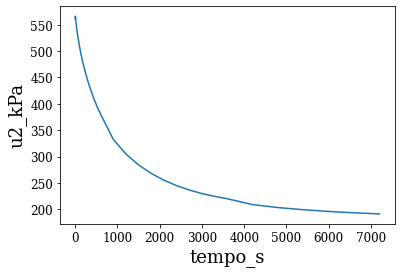

In [66]:
sns.lineplot(data=dados_dissipacao.query("ID == 'CPTu-02' and profundidade_m == 18"), x="tempo_s", y="u2_kPa")

### Gráficos Dissipação

Text(0, 0.5, 'Profundidade (m)')

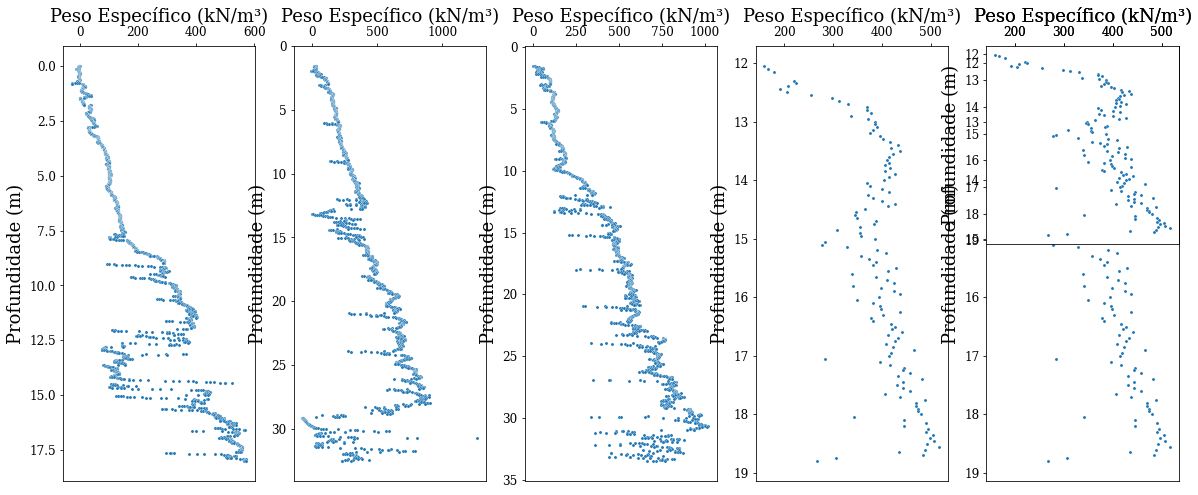

In [67]:
f = plt.figure(figsize=(20,8))
ax1 = f.add_subplot(151)
ax1 = sns.scatterplot(data=dados_scptu_tratados.query("ID == 'CPTu-02'"), x='u2_kPa', y='profundidade_m',
                      s=10, palette="seismic")
# sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
ax1.set_xlabel("Peso Específico (kN/m³)")
ax1.set_ylabel("Profundidade (m)")

ax2 = f.add_subplot(152)
ax2 = sns.scatterplot(data=dados_scptu_tratados.query("ID == 'CPTu-04'"), x='u2_kPa', y='profundidade_m',
                      s=10, palette="seismic")
# sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
ax2.set_xlabel("Peso Específico (kN/m³)")
ax2.set_ylabel("Profundidade (m)")

ax3 = f.add_subplot(153)
ax3 = sns.scatterplot(data=dados_scptu_tratados.query("ID == 'CPTu-05'"), x='u2_kPa', y='profundidade_m',
                      s=10, palette="seismic")
# sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
ax3.set_xlabel("Peso Específico (kN/m³)")
ax3.set_ylabel("Profundidade (m)")

ax4 = f.add_subplot(154)
ax4 = sns.scatterplot(data=dados_scptu_tratados.query("ID == 'CPTu-06'"), x='u2_kPa', y='profundidade_m',
                      s=10, palette="seismic")
# sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
ax4.set_xlabel("Peso Específico (kN/m³)")
ax4.set_ylabel("Profundidade (m)")


ax5 = f.add_subplot(155)
ax5 = sns.scatterplot(data=dados_scptu_tratados.query("ID == 'CPTu-06'"), x='u2_kPa', y='profundidade_m',
                      s=10, palette="seismic")
# sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
ax5.set_xlabel("Peso Específico (kN/m³)")
ax5.set_ylabel("Profundidade (m)")

ax6 = f.add_subplot(255)
ax6 = sns.scatterplot(data=dados_scptu_tratados.query("ID == 'CPTu-06'"), x='u2_kPa', y='profundidade_m',
                      s=10, palette="seismic")
# sns.lineplot(data=dados_scptu_tratados, x='qt_MPa', y='profundidade_m', hue='ID', style='ID', palette="twilight")
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
ax6.set_xlabel("Peso Específico (kN/m³)")
ax6.set_ylabel("Profundidade (m)")

In [ ]:
dados_scptu_tratados.query("ID == 'CPTu-04'")

## <font color=green> Etapas Básicas de um Teste</font>
***

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$;

> ### <font color='red'>Pontos importantes</font>
> - De maneira geral, o alvo do estudo deve ser formulado como a hipótese alternativa $H_1$.
> - A hipótese nula sempre afirma uma igualdade ou propriedade populacional, e $H_1$ a desigualdade que nega $H_0$.
> - No caso da hipótese nula $H_0$ a igualdade pode ser representada por uma igualdade simples "$=$" ou por "$\geq$" e "$\leq$". Sempre complementar ao estabelecido pela hipótese alternativa.
> - A hipótese alternativa $H_1$ deve definir uma desigualdade que pode ser uma diferença simples "$\neq$" ou dos tipos "$>$" e "$<$".


### **Passo 2** - escolha da distribuição amostral adequada;

> ### <font color='red'>Pontos importantes</font>
> - Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **teorema do limite central**.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for desconhecido, deve-se utilizar a distribuição t de Student.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### **Passo 3** - fixação da significância do teste ($\alpha$), que define as regiões de aceitação e rejeição das hipóteses (os valores mais freqüentes são 10%, 5% e 1%);

> ### <font color='red'>Pontos importantes</font>
> - O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.
>
> ![Níveis de Confiança e significância](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img001.png)
>
> - O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.
>
> ![Áreas de Aceitação e Rejeição](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste;

> ### <font color='red'>Pontos importantes</font>
> - Nos testes paramétricos, distância relativa entre a estatística amostral e o valor alegado como provável.
> - Neste passo são obtidas as estatísticas amostrais necessárias à execução do teste (média, desvio-padrão, graus de liberdade etc.)


### **Passo 5** - Aceitação ou rejeição da hipótese nula.

> ### <font color='red'>Pontos importantes</font>
> - No caso de o intervalo de aceitação conter a estatística-teste, aceita-se $H_0$ como estatisticamente válido e rejeita-se $H_1$ como tal.
> - No caso de o intervalo de aceitação não conter a estatística-teste, rejeita-se $H_0$ e aceita-se $H_1$ como provavelmente verdadeira. 
> - A aceitação também se verifica com a probabilidade de cauda (p-valor): se maior que $\alpha$, aceita-se $H_0$.

## <font color=green> Teste de normalidade</font>
***

### Definindo a significância do teste ($\alpha$)

In [ ]:
significancia = 0.05

In [ ]:
dados_scptu_tratados["gamma_kN_m3"].values

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [ ]:
stat_test, p_valor = normaltest(dados_scptu_tratados["gamma_kN_m3"].values)
print(stat_test)
print(p_valor)

In [ ]:
p_valor <= significancia

# Ou seja, se True, a amostra não é proveniente de uma distribuição normal, corroborada pelo gráfico